<a href="https://colab.research.google.com/github/thenameisAnurag/BigData/blob/main/TWITTER_SENTIMANT_ANALYSIS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a

In [26]:
!pip install sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re  # Regular expression
import sklearn
from nltk.corpus import stopwords # Natural language tool kit
from nltk.stem.porter import PorterStemmer  # Porter stemmer -> stemming the data (root word)
from sklearn.feature_extraction.text import TfidfVectorizer # Categorical data -> numerical
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [27]:
data=pd.read_csv('/content/twitter_training.csv')
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [28]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [29]:
columns_name=['id','entity','sentiment','tweet_content']
data=pd.read_csv('/content/twitter_training.csv', names=columns_name)
data

,id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [30]:
data.shape

(74682, 4)

In [31]:
data.isnull().sum()

id                 0
entity             0
sentiment          0
tweet_content    686
dtype: int64

In [32]:
data['sentiment'].value_counts()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

[]

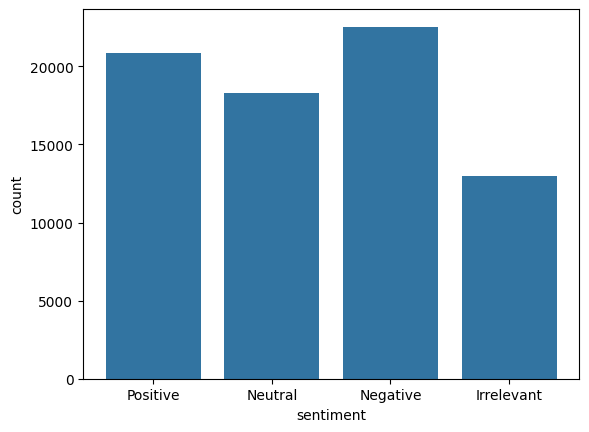

In [33]:
sns.countplot(x='sentiment', data=data)
plt.plot()

# Steaming the text -> converting to roots word and removing all the stop words

In [42]:
from nltk.stem.porter import PorterStemmer

# Initialize Porter Stemmer
porter_stemmer = PorterStemmer()

# Test the stemmer
print(porter_stemmer.stem('running'))


port_stem = PorterStemmer()
stop_words = set(stopwords.words('english'))  # Load English stopwords

def stemming(content):
    if isinstance(content, str):  # Check if content is a string
        # Remove non-alphabetic characters and tokenize
        stream_content = re.sub('[^a-zA-Z]', ' ', content).lower().split()
        # Apply stemming and remove stopwords
        stream_content = [port_stem.stem(word) for word in stream_content if word not in stop_words]
        # Join the stemmed words back into a single string
        return ' '.join(stream_content)
    else:
        return ''  # Return an empty string if content is not a string

# Apply stemming to 'tweet_content' column and store results in 'stream_content' column
data['stream_content'] = data['tweet_content'].apply(stemming)


run


In [43]:
data.head()

,id,entity,sentiment,tweet_content,stream_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im get borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im come borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im get borderland murder


In [53]:
tfidf_vectorizer = TfidfVectorizer()

# Create TF-IDF features
X = tfidf_vectorizer.fit_transform(data['stream_content'])
y = data['sentiment']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict sentiment on the test set
y_pred = logreg_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7672223338019682
